In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from sklearn.model_selection import train_test_split

In [79]:
file_path = []
for file in os.listdir("textdata"):
    if file.endswith(",0).txt"):
        file_path.append(os.path.join("textdata", file))
for file in os.listdir("textdata/TextData"):
    if file.endswith('.txt'):
        file_path.append(os.path.join("textdata/TextData", file))

In [81]:
file_path

['textdata/(6.10,0).txt',
 'textdata/(-15.54,0).txt',
 'textdata/(-12.33,0).txt',
 'textdata/(-3.04,0).txt',
 'textdata/(9.19,0).txt',
 'textdata/(-6.10,0).txt',
 'textdata/(3.04,0).txt',
 'textdata/(12.33,0).txt',
 'textdata/(15.54,0).txt',
 'textdata/(-9.19,0).txt',
 'textdata/TextData/(3,0).txt',
 'textdata/TextData/(-4,0).txt',
 'textdata/TextData/(1,0).txt',
 'textdata/TextData/(5,0).txt',
 'textdata/TextData/(-2,0).txt',
 'textdata/TextData/(2,0).txt',
 'textdata/TextData/(-5,0).txt',
 'textdata/TextData/(0,0).txt',
 'textdata/TextData/(4,0).txt',
 'textdata/TextData/(-1,0).txt',
 'textdata/TextData/(-3,0).txt']

In [82]:
class Preprocessing():
    def __init__(self, path):
        self.path = path
        self.csv = pd.read_csv(path, sep='\t', header=None)
        self.sig = np.array(self.csv[1].values)
        
    def resample(self, sr=128):
        sec = len(self.sig)/1000
        num_sample = int(sec * sr)
        
        return signal.resample(self.sig, num_sample)
    
    def drop(self, sig, sec=2, sr=128):
        cut_sig = []

        cut_sig.append(sig[int(sec * sr):-int(sec * sr)])

        return np.array(cut_sig).T

    def cutt(self):
        sig = self.drop(self.resample())
 
        signal1 = sig[:,0]  
        diff1 = (signal1[1:] - signal1[:-1])
                
        diff = abs(diff1)
        idx = np.where(diff>np.quantile(diff, 0.93))[0]
        idx_diff = idx[1:] - idx[:-1]
        
        #Slicing
        id_sum = 0
        id_ = []
        for i, idx_indiv in enumerate(idx_diff):
            id_sum += idx_indiv

            if id_sum > 100:
                id_.append(i+1)
                id_sum = 0

        idx_result = idx[id_]   
        
        #Labeling
        x_label, y_label = self.path.split('/')[-1].split(')')[0].split(',')
        x_label = np.float64(x_label[1:])
        
        if 'TextData' in self.path:
            x_label = int(x_label)
            
        else:
            if x_label == 3.04:
                x_label = 1
            elif x_label == 6.10:
                x_label = 2
            elif x_label == 9.19:
                x_label = 3
            elif x_label == 12.33:
                x_label = 4
            elif x_label == 15.54:
                x_label = 5
            elif x_label == -3.04:
                x_label = -1
            elif x_label == -6.10:
                x_label = -2
            elif x_label == -9.19:
                x_label = -3
            elif x_label == -12.33:
                x_label = -4
            elif x_label == -15.54:
                x_label = -5           
            else:
                assert x_label == 0.0
                x_label = 0

        label = x_label
        label_inversed = -label

        X = []
        y = []
        if x_label > 0:
            for i in idx_result:
                if i+44>len(sig):
                    break
                    
                if diff1[i]>0:
                    X.append(sig[i-5:i+59])
                    y.append(label)
                    
                else:
                    X.append(sig[i-5:i+59])
                    y.append(label_inversed)
                
        elif x_label < 0:
            for i in idx_result:
                if i+44>len(sig):
                    break
                    
                if diff1[i]>0:
                    X.append(sig[i-20:i+44])
                    y.append(label_inversed)
                    
                else:
                    X.append(sig[i-20:i+44])
                    y.append(label)
                    
        else:
            for i in idx_result:
                if i + 44 > len(sig):
                    break
                else:
                    X.append(sig[i-20:i+44])
                    y.append(label)
        return X, y

In [83]:
X = []
y = []
for file in file_path:
    x = Preprocessing(file)
    x_, y_ = x.cutt()
    X.extend(np.array(x_))
    y.extend(np.array(y_))
X = np.array(X)
y = np.array(y)

In [89]:
print(X.shape, y.shape)

(1847, 64, 1) (1847,)


In [86]:
np.unique(y, return_counts=True)

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 array([188, 187, 173, 164, 167,  92, 176, 160, 167, 187, 186]))

In [90]:
with open('X.pkl', 'wb') as f:
    pickle.dump(X, f)
with open('y.pkl', 'wb') as f:
    pickle.dump(y, f)

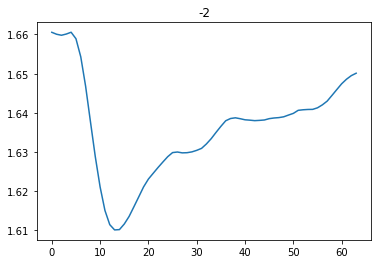

In [87]:
plt.plot(X[0])
plt.title(y[0])
plt.show()

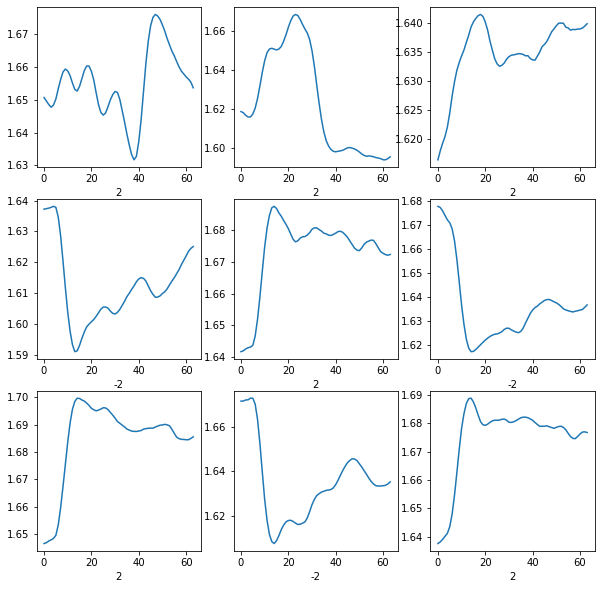

In [88]:
plt.figure(figsize=(10,10))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.plot(X[i])
    plt.xlabel(y[i])